In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from SBR import sosf,acf,ps,sosfnorm,sosfw,sosfwx,sosfw2,sosfs,sosfnorms
from turbustat.statistics import PowerSpectrum


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

In [2]:
#Input
#Constant
c=299792.459#km/s
#Iraf
corrhelio=25.68#km/s
#Theory Lambda
lr=[6562.8,6548,6583,6717,6731]#AngstromsR
#lb=[4861.36,4958.9,5006.9]#AngstromsB
#LimitData
min0=75
max0=130

In [3]:
inputf='595.Isis.WHT.Red.txt'

data0=pd.read_table(inputf)
data1=data0.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})

mr=(data1.X<max0)&(data1.X>min0)
data1=data1[mr]

In [4]:
for i in range(1):
    Nx=i
    N=str(Nx)

    data2=data1[['X','Y','Center.'+N,'Peak.'+N,'Width.'+N]]

    RVo=c*(data2["Center."+N]-lr[Nx])/lr[Nx]
    RV=RVo+corrhelio

    data2=data2.assign(RV=RV.values)

    a=[data2.X,data2.Y,data2.RV,data2['Peak.'+N]]
    data3=pd.DataFrame(a).T
    data3.columns=['X','Y','RV','I']
    data3.to_csv('dataII'+str(int(lr[Nx]))+'.csv')

In [5]:
datap='dataII6562.csv'
dt=pd.read_csv(datap)
dt=dt.rename(columns={'Unnamed: 0':'No'})
dt=dt.drop('No',axis=1)
os.remove(datap)
dt.describe()

,X,Y,RV,I
count,369.00000,369.000000,369.000000,369.000000
mean,101.91600,10.555556,-1017.841296,1190.327263
std,15.88847,7.003320,15594.515616,1745.710725
min,75.09600,0.000000,-299766.779000,0.000000
25%,88.50600,5.000000,-213.594837,269.400000
50%,101.91600,11.000000,-204.641445,533.400000
75%,115.32600,15.000000,-196.555984,1159.000000
max,128.73600,22.000000,-177.781268,9957.000000


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


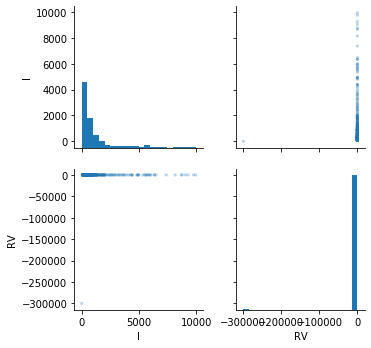

In [6]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )


In [7]:
mx=(dt.RV<-100)&(dt.RV>-300)
dt=dt[mx]


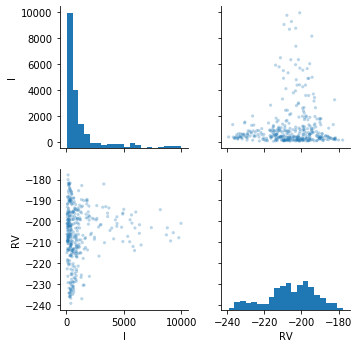

In [8]:
sns.pairplot(dt, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [9]:
dte=[109.96,5,-204.54,2420]
dte=pd.DataFrame(dte).T
dte.columns=['X','Y','RV','I']
#dte

In [10]:
dt = pd.concat([dt, dte], ignore_index=True)

In [11]:
dt.describe()

,X,Y,RV,I
count,369.000000,369.000000,369.000000,369.000000
mean,101.915995,10.555556,-206.019510,1196.885528
std,15.888467,7.003320,13.196813,1745.772479
min,75.096000,0.000000,-239.267319,54.730000
25%,88.506000,5.000000,-213.503476,270.800000
50%,101.916000,11.000000,-204.595764,537.500000
75%,115.326000,15.000000,-196.555984,1165.000000
max,128.736000,22.000000,-177.781268,9957.000000


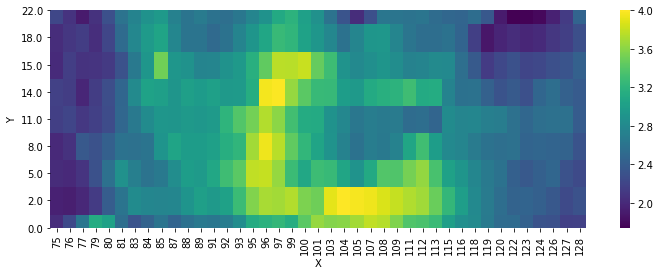

In [12]:
datal=dt.copy()
datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
#datal.Y=datal.Y.astype(int)

dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_f, cmap="viridis",xticklabels='auto')
plt.gca().invert_yaxis()
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


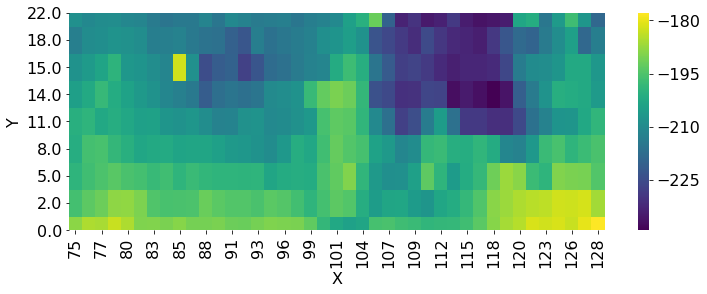

In [13]:

datal=dt.copy()
datal.X=datal.X.astype(int)
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="16"

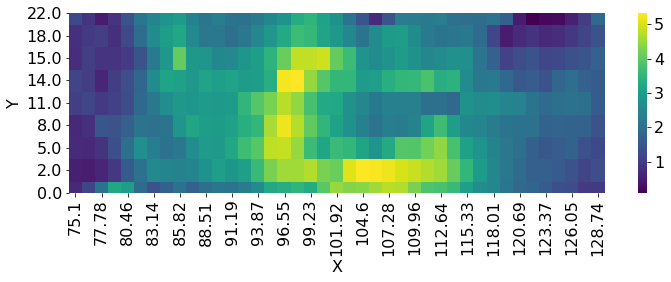

In [14]:
W=np.log(abs((dt.RV*dt.I)/dt.I.max()))
dtW=[dt.X,dt.Y,W]
dtW=pd.DataFrame(dtW).T
dtW.columns=['X','Y','W']

dtH_W=(dtW.round(2)).pivot(index='Y', columns='X', values='W')
fig, ax = plt.subplots(figsize=(12, 3.3))
sns.heatmap(dtH_W, cmap="viridis")
plt.gca().invert_yaxis()


/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:243: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/zalenovo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:183: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:695: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD

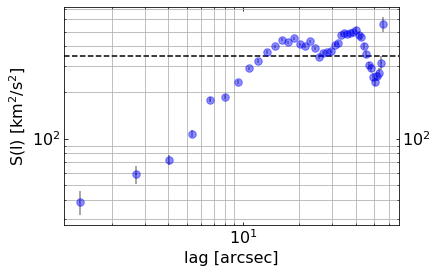

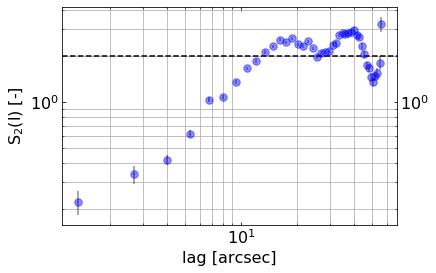

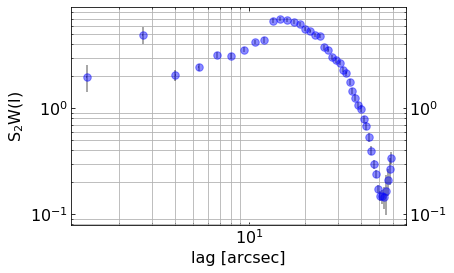

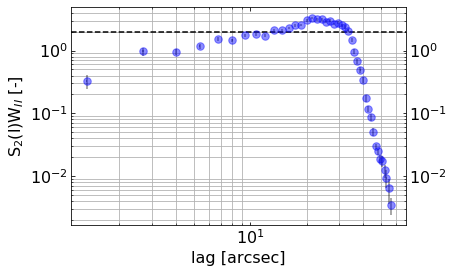

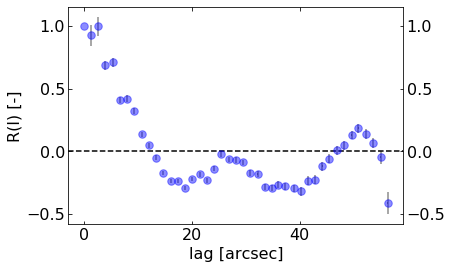

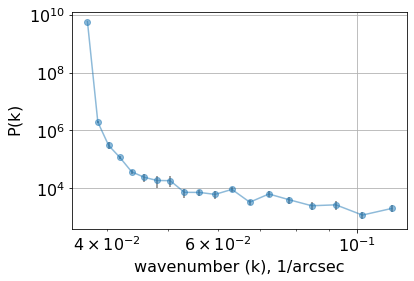

In [15]:
sfH00=sosf(dt)
sfnH00=sosfnorm(dt)
sfwH00=sosfwx(dt)
sfw2H00=sosfw2(dt)
afH00=acf(dt)
psH00=ps(dt)

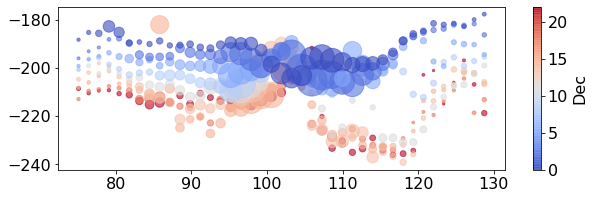

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

In [17]:
pRA = np.poly1d(np.polyfit(dt.X, dt.RV, 3))
print(pRA)

           3         2
0.0008538 x - 0.247 x + 23.25 x - 917.4


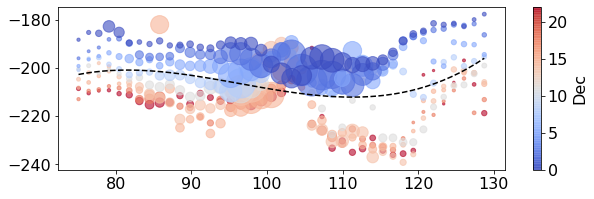

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV, c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt.X.min(), dt.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

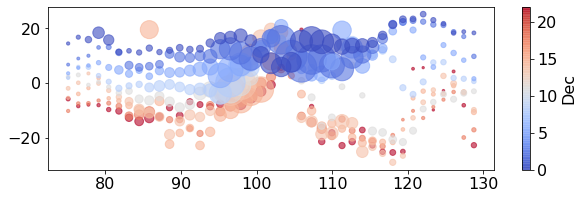

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt.X, dt.RV - pRA(dt.X), c=dt.Y, s=dt.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

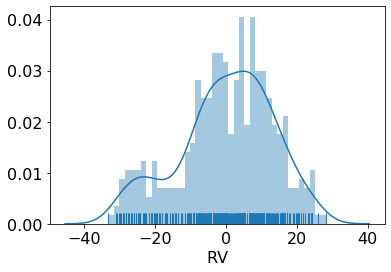

In [20]:
hist=dt.RV-dt.RV.mean()
sns.distplot(hist,bins=40,rug=True)

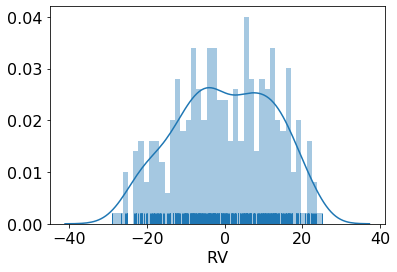

In [21]:
hist2=dt.RV - pRA(dt.X)
sns.distplot(hist2,bins=40,rug=True)

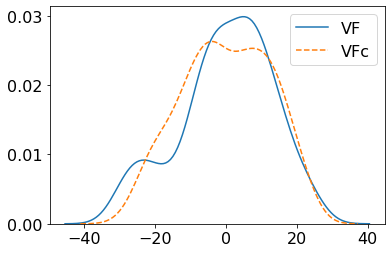

In [22]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')


In [23]:
dtc= pd.DataFrame({'X': dt.X, 'Y': dt.Y, 'RV':dt.RV - pRA(dt.X), 'I':dt.I})
dtc.describe()

,X,Y,RV,I
count,369.000000,369.000000,3.690000e+02,369.000000
mean,101.915995,10.555556,-1.971804e-13,1196.885528
std,15.888467,7.003320,1.242184e+01,1745.772479
min,75.096000,0.000000,-2.904006e+01,54.730000
25%,88.506000,5.000000,-8.973211e+00,270.800000
50%,101.916000,11.000000,-1.996977e-01,537.500000
75%,115.326000,15.000000,1.031378e+01,1165.000000
max,128.736000,22.000000,2.513337e+01,9957.000000


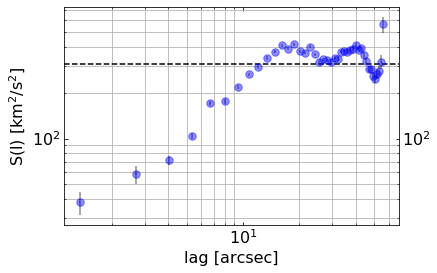

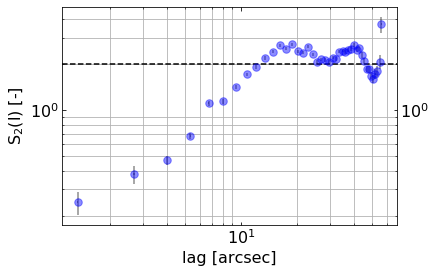

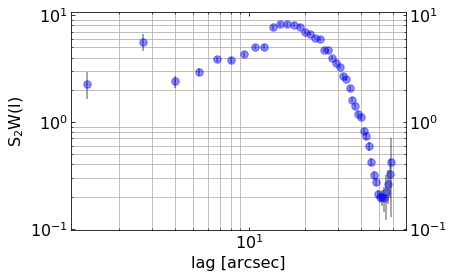

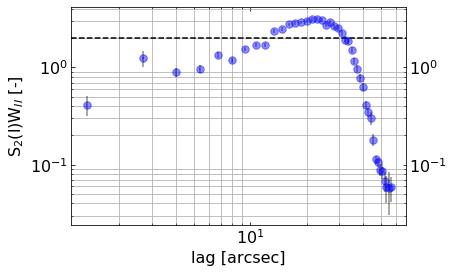

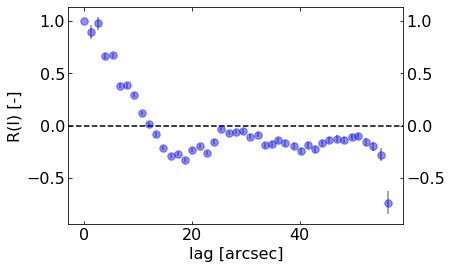

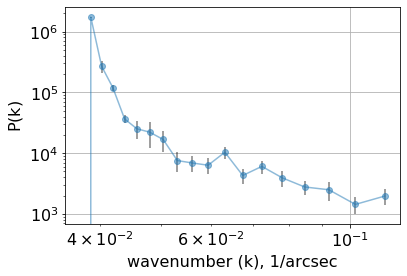

In [24]:
sfH00c=sosf(dtc)
sfnH00c=sosfnorm(dtc)
sfwH00c=sosfwx(dtc)
sfw2H00c=sosfw2(dtc)
afH00c=acf(dtc)
psH00c=ps(dtc)

In [25]:
#II

In [26]:
mr=(dt.X<120)&(dt.X>80)
dt1=dt[mr]
dt1.describe()

,X,Y,RV,I
count,270.000000,270.000000,270.000000,270.000000
mean,99.904493,10.555556,-208.142231,1558.500704
std,11.628495,7.006812,13.331037,1916.250329
min,80.460000,0.000000,-239.267319,74.990000
25%,89.847000,5.000000,-215.330699,443.575000
50%,99.904500,11.000000,-206.560029,826.350000
75%,109.962000,15.000000,-197.766519,1702.750000
max,119.349000,22.000000,-182.120923,9957.000000


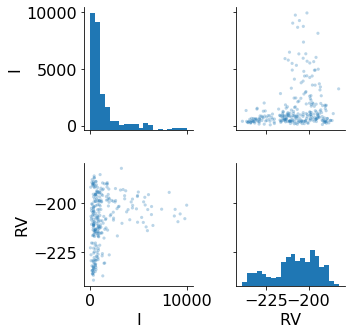

In [27]:
sns.pairplot(dt1, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

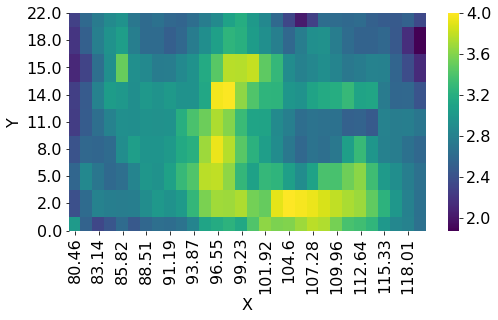

In [28]:
datal=dt1.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

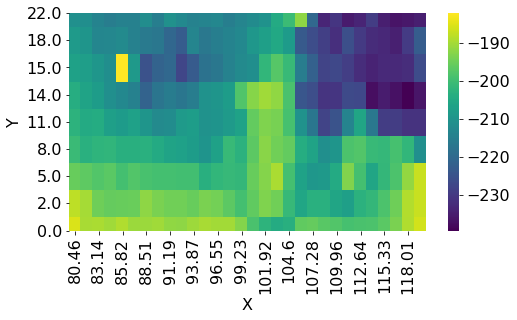

In [29]:
datal=dt1.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:464: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:473: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:908: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:917: RuntimeWarning: divide by zero encountered in double_scalars
  g=e/f
/home/zalenovo/Dropbox/Cloud.Lap/codepycloud/PhD.Final/SBR.Final/SBR.py:1413: RuntimeWarning: invalid value encountered in log
  e=np.log(a/b)


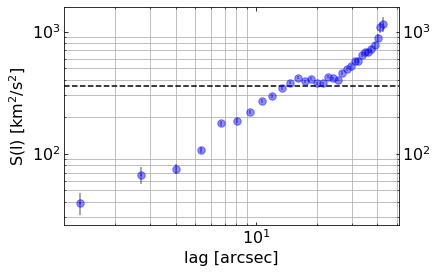

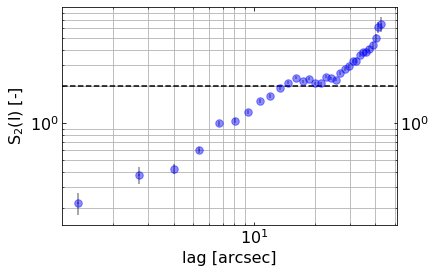

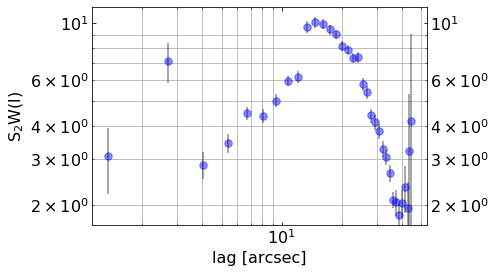

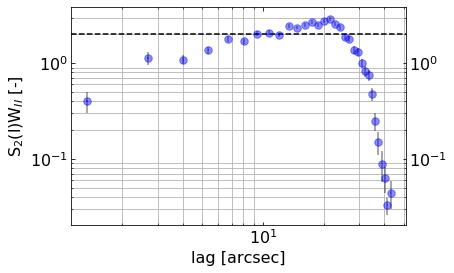

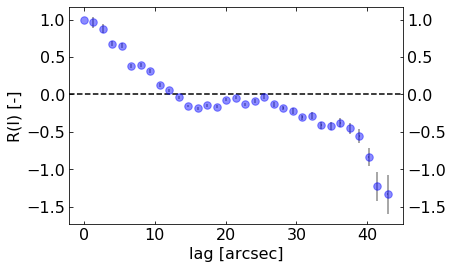

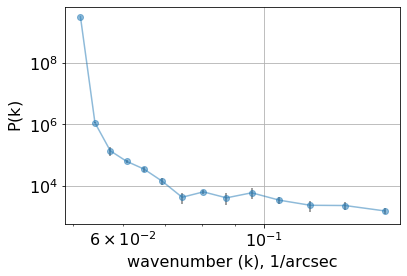

In [30]:
sfH01=sosfs(dt1)
sfnH01=sosfnorms(dt1)
sfwH01=sosfwx(dt1)
sfw2H01=sosfw2(dt1)
afH01=acf(dt1)
psH01=ps(dt1)

            3           2
-0.0003608 x + 0.09565 x - 8.593 x + 57.12


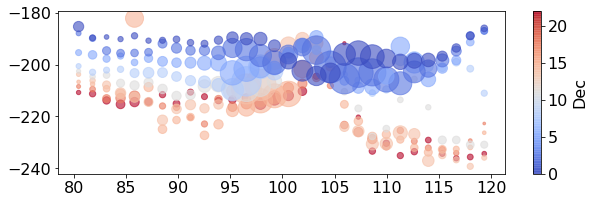

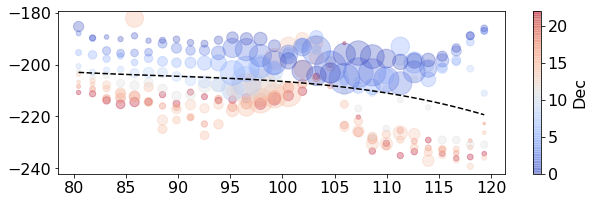

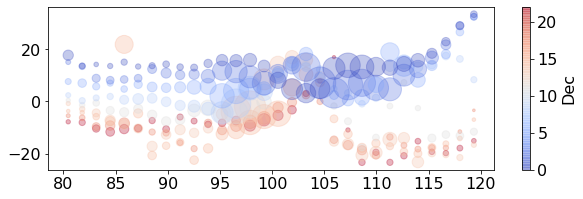

In [31]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt1.X, dt1.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV, c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

RAgrid = np.linspace(dt1.X.min(), dt1.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt1.X, dt1.RV - pRA(dt1.X), c=dt1.Y, s=dt1.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")


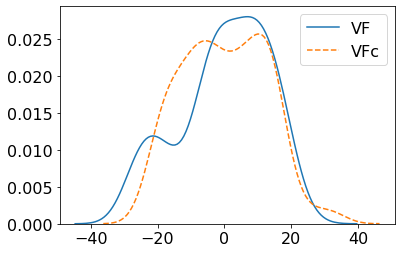

In [32]:
hist=dt1.RV-dt1.RV.mean()
hist2=dt1.RV - pRA(dt1.X)

sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')

dtc= pd.DataFrame({'X': dt1.X, 'Y': dt1.Y, 'RV':dt1.RV - pRA(dt1.X), 'I':dt1.I})

In [33]:
dtc.describe()

,X,Y,RV,I
count,270.000000,270.000000,2.700000e+02,270.000000
mean,99.904493,10.555556,3.179021e-14,1558.500704
std,11.628495,7.006812,1.251261e+01,1916.250329
min,80.460000,0.000000,-2.325159e+01,74.990000
25%,89.847000,5.000000,-1.028937e+01,443.575000
50%,99.904500,11.000000,-1.765288e-01,826.350000
75%,109.962000,15.000000,1.031529e+01,1702.750000
max,119.349000,22.000000,3.336013e+01,9957.000000


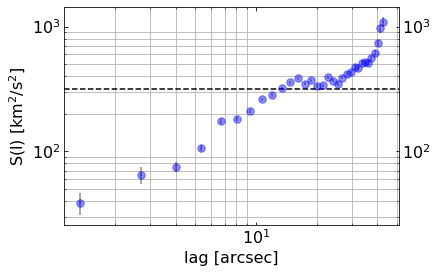

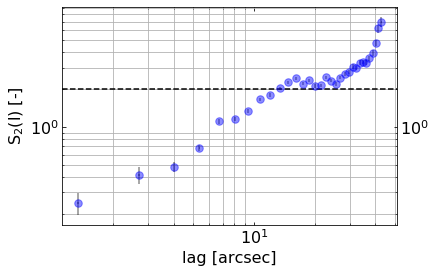

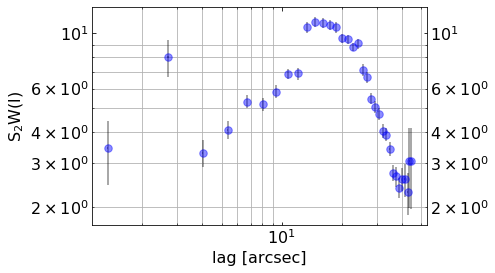

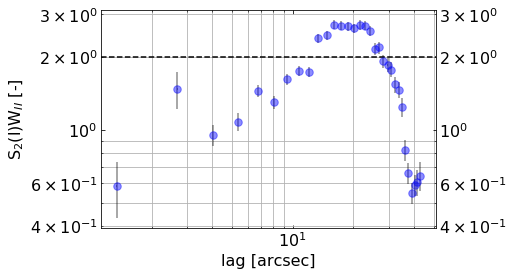

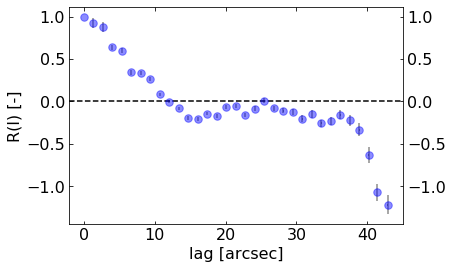

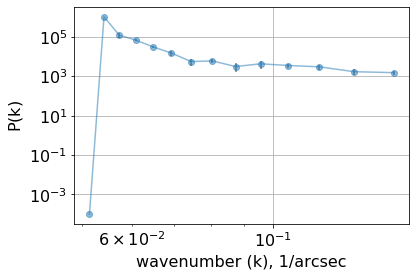

In [34]:
sfH01c=sosfs(dtc)
sfnH01c=sosfnorms(dtc)
sfwH01c=sosfwx(dtc)
sfw2H01c=sosfw2(dtc)
afH01c=acf(dtc)
psH01c=ps(dtc)

In [35]:
#III

In [36]:
mr=(dt.X<115)&(dt.X>91)
dt2=dt[mr]
dt2.describe()

,X,Y,RV,I
count,162.000000,162.000000,162.000000,162.000000
mean,102.586488,10.555556,-208.216874,2197.276543
std,6.978839,7.015511,12.302327,2237.718973
min,91.188000,0.000000,-237.074651,107.100000
25%,96.552000,5.000000,-215.364959,622.350000
50%,102.586500,11.000000,-206.422987,1297.000000
75%,108.621000,15.000000,-198.520248,2829.000000
max,113.985000,22.000000,-189.429814,9957.000000


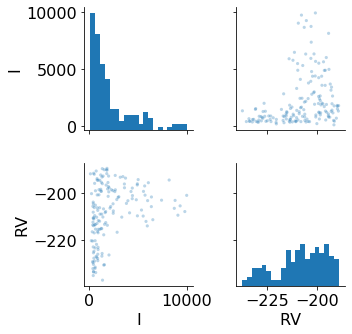

In [37]:
sns.pairplot(dt2, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

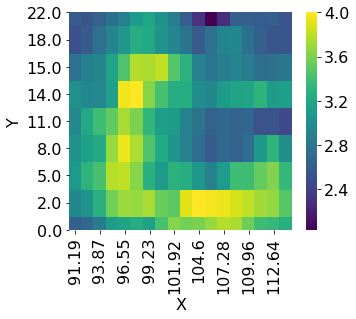

In [38]:
datal=dt2.copy()
datal.I=np.log10(datal.I)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(dataH_f, cmap="viridis")
plt.gca().invert_yaxis()

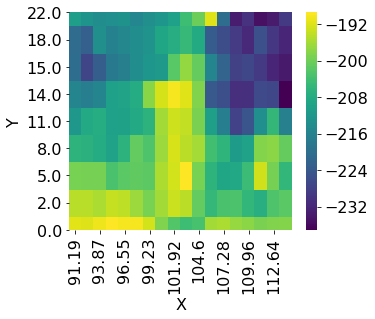

In [39]:
datal=dt2.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(dataH_rv, cmap="viridis")
plt.gca().invert_yaxis()

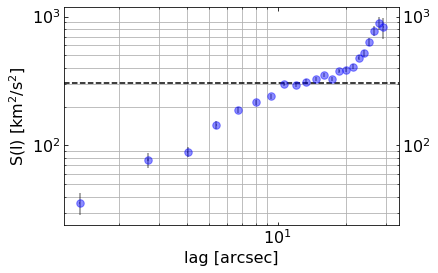

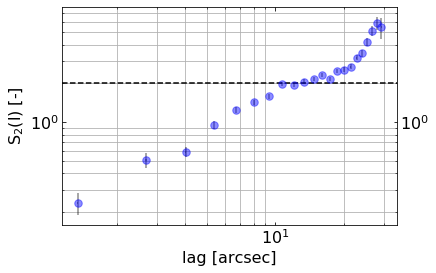

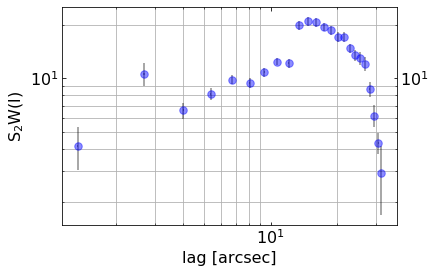

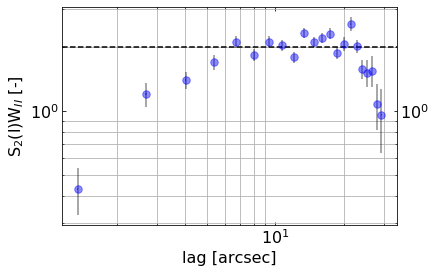

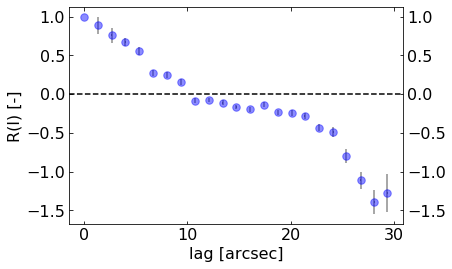

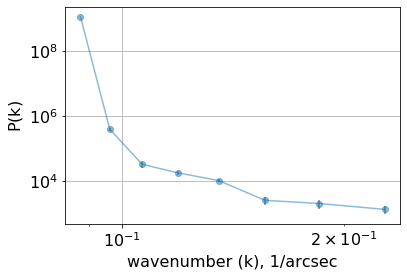

In [40]:
sfH02=sosfs(dt2)
sfnH02=sosfnorms(dt2)
sfwH02=sosfwx(dt2)
sfw2H02=sosfw2(dt2)
afH02=acf(dt2)
psH02=ps(dt2)

          3         2
0.004284 x - 1.404 x + 152 x - 5646


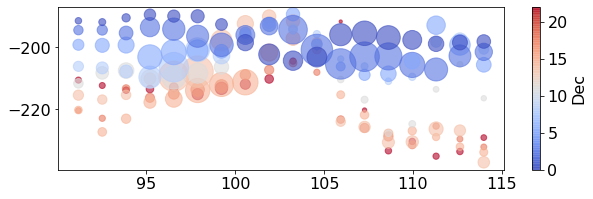

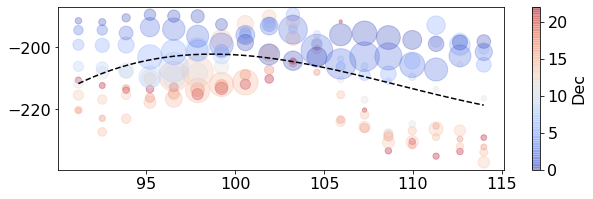

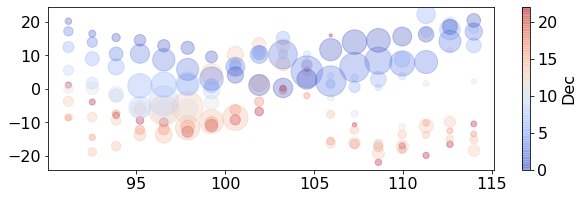

In [41]:
fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.6, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

pRA = np.poly1d(np.polyfit(dt2.X, dt2.RV, 3))
print(pRA)

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV, c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")
RAgrid = np.linspace(dt2.X.min(), dt2.X.max())
ax.plot(RAgrid, pRA(RAgrid), c="k", ls="--")

fig, ax = plt.subplots(figsize=(10, 3))
scat = plt.scatter(dt2.X, dt2.RV - pRA(dt2.X), c=dt2.Y, s=dt2.I*0.1, alpha=0.3, cmap="coolwarm")
fig.colorbar(scat, ax=ax).set_label("Dec")

hist=dt2.RV-dt2.RV.mean()
hist2=dt2.RV - pRA(dt2.X)



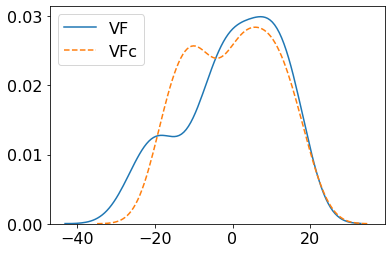

In [42]:
sns.kdeplot(hist, label="VF")
sns.kdeplot(hist2, label="VFc", linestyle='--')

dtc= pd.DataFrame({'X': dt2.X, 'Y': dt2.Y, 'RV':dt2.RV - pRA(dt2.X), 'I':dt2.I})

In [43]:
dtc.describe()


,X,Y,RV,I
count,162.000000,162.000000,1.620000e+02,162.000000
mean,102.586488,10.555556,-8.419142e-12,2197.276543
std,6.978839,7.015511,1.116658e+01,2237.718973
min,91.188000,0.000000,-2.193999e+01,107.100000
25%,96.552000,5.000000,-9.786626e+00,622.350000
50%,102.586500,11.000000,1.044441e+00,1297.000000
75%,108.621000,15.000000,9.443605e+00,2829.000000
max,113.985000,22.000000,2.229753e+01,9957.000000


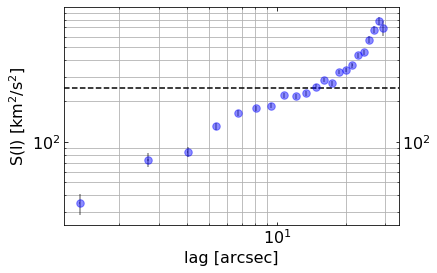

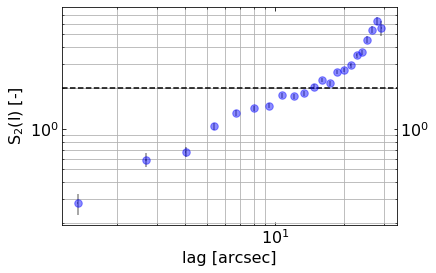

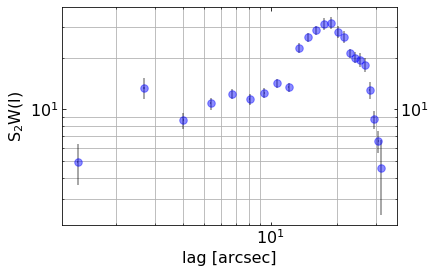

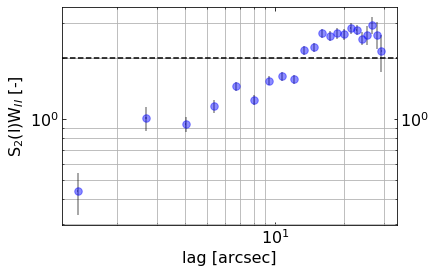

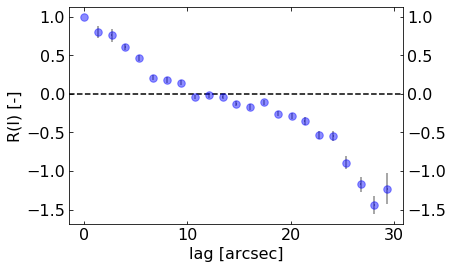

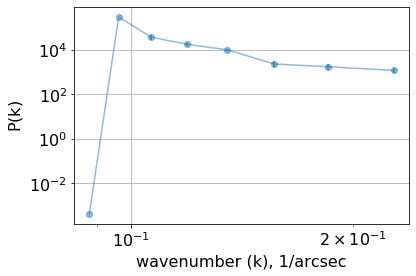

In [44]:


sfH02c=sosfs(dtc)
sfnH02c=sosfnorms(dtc)
sfwH02c=sosfwx(dtc)
sfw2H02c=sosfw2(dtc)
afH02c=acf(dtc)
psH02c=ps(dtc)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


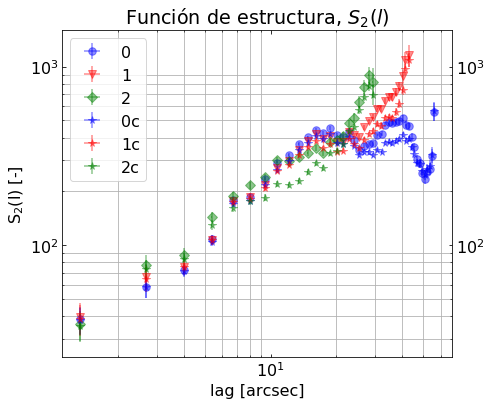

In [45]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfH00['Lag'],sfH00['Nmqvd'],xerr=sfH00.ErrX, yerr=sfH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(sfH01['Lag'],sfH01['Nmqvd'],xerr=sfH01.ErrX, yerr=sfH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(sfH02['Lag'],sfH02['Nmqvd'],xerr=sfH02.ErrX, yerr=sfH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(sfH00c['Lag'],sfH00c['Nmqvd'],xerr=sfH00c.ErrX, yerr=sfH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(sfH01c['Lag'],sfH01c['Nmqvd'],xerr=sfH01c.ErrX, yerr=sfH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(sfH02c['Lag'],sfH02c['Nmqvd'],xerr=sfH02c.ErrX, yerr=sfH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


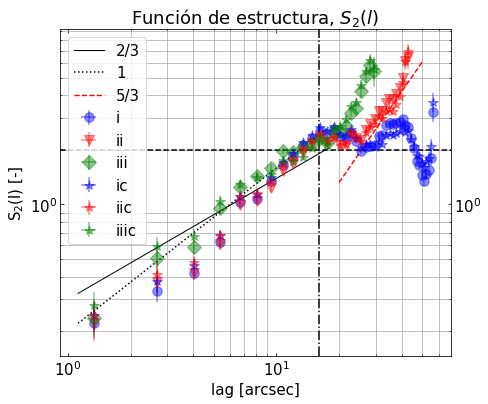

In [46]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfnH00['Lag'],sfnH00['Nmqvd'],xerr=sfnH00.ErrX, yerr=sfnH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfnH01['Lag'],sfnH01['Nmqvd'],xerr=sfnH01.ErrX, yerr=sfnH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfnH02['Lag'],sfnH02['Nmqvd'],xerr=sfnH02.ErrX, yerr=sfnH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfnH00c['Lag'],sfnH00c['Nmqvd'],xerr=sfnH00c.ErrX, yerr=sfnH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfnH01c['Lag'],sfnH01c['Nmqvd'],xerr=sfnH01c.ErrX, yerr=sfnH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfnH02c['Lag'],sfnH02c['Nmqvd'],xerr=sfnH02c.ErrX, yerr=sfnH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')

ax.set(xscale='log',yscale='log')
sgrid = np.logspace(.05, 1.25)

ax.plot(sgrid, 0.3*sgrid**(2/3), color="black", lw=1, label='2/3')
ax.plot(sgrid, 0.2*sgrid**(0.9), color="black", lw=1.5, label='1',linestyle=':')
sgrid2 = np.logspace(1.3, 1.7)
ax.plot(sgrid2, 0.009*sgrid2**(5/3), color="r", lw=1.4, label='5/3', linestyle='--')

ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=16, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

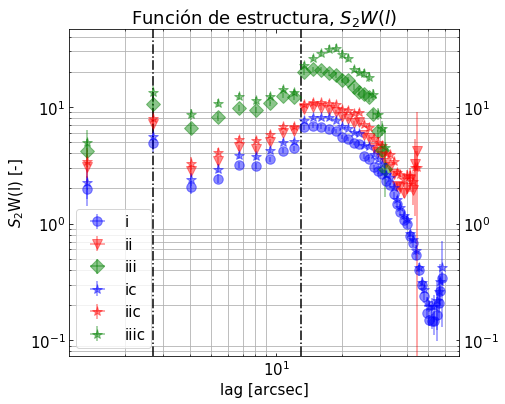

In [47]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfwH00['Lag'],sfwH00['Nmqvd'],xerr=sfwH00.ErrX, yerr=sfwH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfwH01['Lag'],sfwH01['Nmqvd'],xerr=sfwH01.ErrX, yerr=sfwH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfwH02['Lag'],sfwH02['Nmqvd'],xerr=sfwH02.ErrX, yerr=sfwH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfwH00c['Lag'],sfwH00c['Nmqvd'],xerr=sfwH00c.ErrX, yerr=sfwH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfwH01c['Lag'],sfwH01c['Nmqvd'],xerr=sfwH01c.ErrX, yerr=sfwH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfwH02c['Lag'],sfwH02c['Nmqvd'],xerr=sfwH02c.ErrX, yerr=sfwH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=13, color='k', linestyle='-.')
ax.axvline(x=2.7, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$S_{2}$W(l) [-]')
plt.title('Función de estructura, $S_{2}W(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

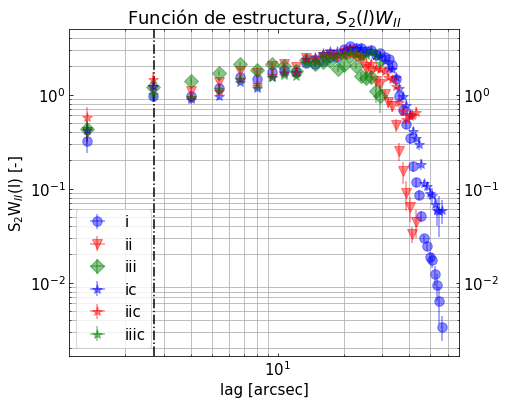

In [48]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(sfw2H00['Lag'],sfw2H00['Nmqvd'],xerr=sfw2H00.ErrX, yerr=sfw2H00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(sfw2H01['Lag'],sfw2H01['Nmqvd'],xerr=sfw2H01.ErrX, yerr=sfw2H01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(sfw2H02['Lag'],sfw2H02['Nmqvd'],xerr=sfw2H02.ErrX, yerr=sfw2H02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(sfw2H00c['Lag'],sfw2H00c['Nmqvd'],xerr=sfw2H00c.ErrX, yerr=sfw2H00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(sfw2H01c['Lag'],sfw2H01c['Nmqvd'],xerr=sfw2H01c.ErrX, yerr=sfw2H01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(sfw2H02c['Lag'],sfw2H02c['Nmqvd'],xerr=sfw2H02c.ErrX, yerr=sfw2H02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
#sgrid = np.logspace(.05, 1.25)
#ax.plot(sgrid, 0.5*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.axvline(x=2.7, color='k', linestyle='-.')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$W$_{II}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)W_{II}$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower left')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


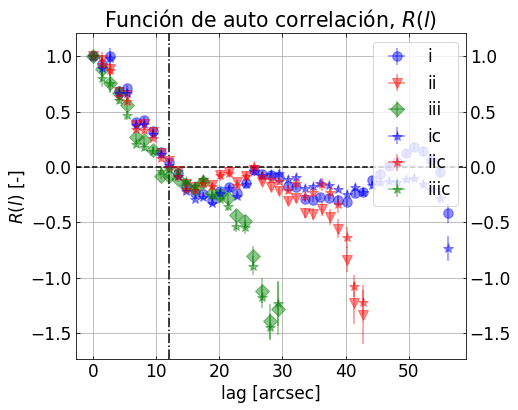

In [49]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(afH00['Lag'],afH00['Nmqvd'],xerr=afH00.ErrX, yerr=afH00.ErrY, fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(afH01['Lag'],afH01['Nmqvd'],xerr=afH01.ErrX, yerr=afH01.ErrY, fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(afH02['Lag'],afH02['Nmqvd'],xerr=afH02.ErrX, yerr=afH02.ErrY, fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
ax.errorbar(afH00c['Lag'],afH00c['Nmqvd'],xerr=afH00c.ErrX, yerr=afH00c.ErrY, fmt="*",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(afH01c['Lag'],afH01c['Nmqvd'],xerr=afH01c.ErrX, yerr=afH01c.ErrY, fmt="*",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(afH02c['Lag'],afH02c['Nmqvd'],xerr=afH02c.ErrX, yerr=afH02c.ErrY, fmt="*",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')

ax.axhline(y=0, color='k', linestyle='--')
ax.axvline(x=12, color='k', linestyle='-.')

ax.set(xlabel='lag [arcsec]', ylabel='$R(l)$ [-]')
plt.title('Función de auto correlación, $R(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='major')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

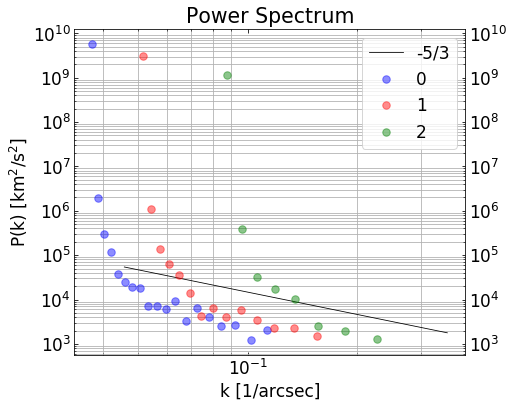

In [50]:

fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
#ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
#ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(-1.34, -0.45)
ax.plot(sgrid, (10**2.5)*sgrid**(-5/3), color="k", lw=0.8, label='-5/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [km$^{2}$/s$^{2}$]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

#plt.xlim(1,25)
#plt.ylim(0.3,2.75)

(316.22776601683796, 10000000)

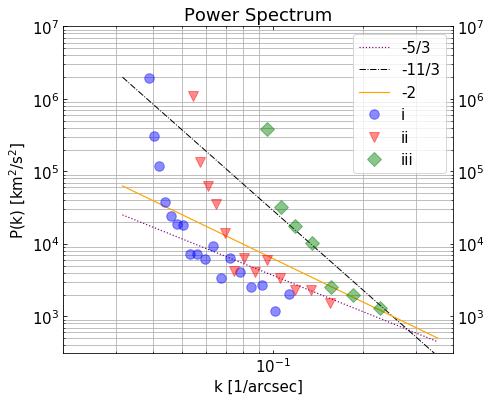

In [51]:
fig, ax=plt.subplots(figsize=(7,6))
ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='i')
ax.errorbar(psH01['k'],psH01['Pk'], fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='ii')
ax.errorbar(psH02['k'],psH02['Pk'], fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iii')
#ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="*",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
#ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="*",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
#ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="*",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(-1.5, -0.45)
ax.plot(sgrid, (10**1.9)*sgrid**(-5/3), color="purple", lw=1.2, label='-5/3', linestyle=':')
ax.plot(sgrid, (10**0.8)*sgrid**(-11/3), color="k", lw=1, label='-11/3', linestyle='-.')
ax.plot(sgrid, (10**1.8)*sgrid**(-2), color="orange", lw=1.2, label='-2')

#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [km$^{2}$/s$^{2}$]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlim(0.02,.4)
plt.ylim(10**2.5,10**7)

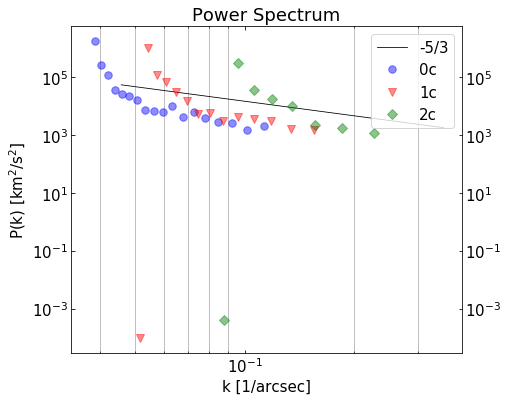

In [52]:
fig, ax=plt.subplots(figsize=(7,6))
#ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
#ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
#ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0c')
ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="v",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1c')
ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="D",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2c')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(-1.34, -0.45)
ax.plot(sgrid, (10**2.5)*sgrid**(-5/3), color="k", lw=0.8, label='-5/3')
#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [km$^{2}$/s$^{2}$]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

(316.22776601683796, 10000000)

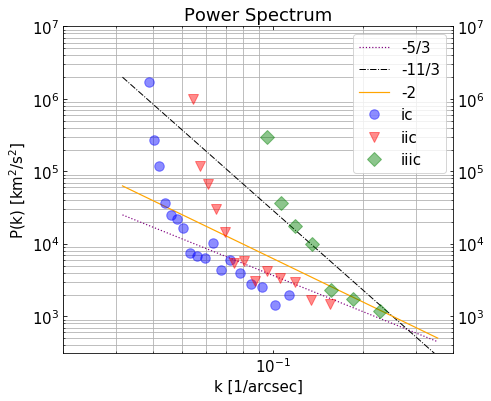

In [53]:

fig, ax=plt.subplots(figsize=(7,6))
#ax.errorbar(psH00['k'],psH00['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=7.5, label='0')
#ax.errorbar(psH01['k'],psH01['Pk'], fmt="o",color='r', ecolor='r', alpha=0.45, markersize=7.5, label='1')
#ax.errorbar(psH02['k'],psH02['Pk'], fmt="o",color='g', ecolor='g', alpha=0.45, markersize=7.5, label='2')
ax.errorbar(psH00c['k'],psH00c['Pk'], fmt="o",color='b', ecolor='b', alpha=0.45, markersize=9.5, label='ic')
ax.errorbar(psH01c['k'],psH01c['Pk'], fmt="v",color='r', ecolor='r', alpha=0.45, markersize=9.5, label='iic')
ax.errorbar(psH02c['k'],psH02c['Pk'], fmt="D",color='g', ecolor='g', alpha=0.45, markersize=9.5, label='iiic')
ax.set(xscale='log',yscale='log')
sgrid = np.logspace(-1.5, -0.45)
ax.plot(sgrid, (10**1.9)*sgrid**(-5/3), color="purple", lw=1.2, label='-5/3', linestyle=':')
ax.plot(sgrid, (10**0.8)*sgrid**(-11/3), color="k", lw=1, label='-11/3', linestyle='-.')
ax.plot(sgrid, (10**1.8)*sgrid**(-2), color="orange", lw=1.2, label='-2')

#ax.axhline(y=2, color='k', linestyle='--')
ax.set(xlabel='k [1/arcsec]', ylabel='P(k) [km$^{2}$/s$^{2}$]')
plt.title('Power Spectrum')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper right')
plt.grid(which='minor')


plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlim(0.02,.4)
plt.ylim(10**2.5,10**7)

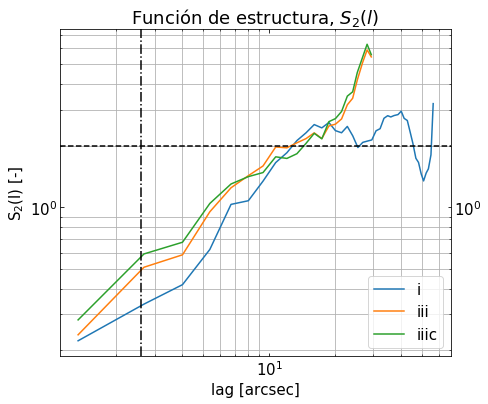

In [54]:
fig, ax=plt.subplots(figsize=(7,6))

plt.loglog(sfnH00.Lag, sfnH00.Nmqvd, label='i')
plt.loglog(sfnH02.Lag, sfnH02.Nmqvd, label='iii')
plt.loglog(sfnH02c.Lag, sfnH02c.Nmqvd, label='iiic')

#plt.xlim(1,25)
#plt.ylim(0.3,2.75)
sgrid = np.logspace(0.4, 1.25)
sgrid2 = np.logspace(0.1, 0.45)
#ax.plot(sgrid, 0.35*sgrid**(2/3), color="k", lw=0.8, label='2/3')
#ax.plot(sgrid2, 0.15*sgrid2**(5/3), color="r", lw=1.0, label='5/3',linestyle='-.')

sgrid3 = np.logspace(0.1, 0.8)
sgrid4 = np.logspace(0.75, 0.95)
#ax.plot(sgrid3, 0.8*sgrid3**(0.55), color="k", lw=2.0, label='0.55',linestyle=':')
#ax.plot(sgrid4, 0.25*sgrid4**(1.1), color="r", lw=2.0, label='1.1',linestyle='-')

plt.grid(which='minor')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='lower right')
ax.axhline(y=2, color='k', linestyle='--')

ax.axvline(x=2.6, color='k', linestyle='-.')

#ax.axhline(y=2, color='k', linestyle='--')

In [55]:
#sfH02.to_csv('datasfH02II.csv')

In [56]:
GT='GetData02.csv'
dtx=pd.read_csv(GT)
#dt=dtx.rename(columns={'Unnamed: 0':'No'})
#dt=dt.drop('No',axis=1)
#os.remove(datap)
dtx.describe()

,pc,S,pc.1,S.1,pc.2,S.2,pc.3,S.3,pc.4,S.4,pc.5,S.5
count,44.000000,44.000000,38.000000,38.000000,38.000000,38.000000,32.000000,32.000000,41.000000,41.000000,41.000000,41.000000
mean,153.415977,74.576386,153.670632,60.099184,144.309474,119.791053,133.825312,125.812500,149.685366,55.964878,147.667073,46.026341
std,81.671930,27.484528,87.384921,22.810842,79.258877,29.788812,81.478815,26.555793,81.379725,26.579667,80.230553,7.661095
min,16.637000,7.443000,16.663000,16.002000,16.410000,43.960000,16.410000,53.090000,16.330000,8.880000,16.330000,26.240000
25%,88.233750,62.226000,77.806750,40.146500,77.920000,97.810000,67.682500,106.472500,82.800000,34.670000,82.800000,40.740000
50%,146.265000,77.712000,152.281000,61.844500,139.860000,124.405000,120.930000,132.930000,148.640000,56.670000,144.490000,43.910000
75%,215.948500,93.523000,228.126250,81.395500,209.782500,142.832500,191.285000,144.650000,214.770000,77.040000,208.770000,53.300000
max,294.119000,132.145000,293.667000,93.523000,277.360000,167.010000,296.880000,158.950000,293.230000,121.380000,296.010000,55.960000


In [57]:
dtx['pc.1']=dtx['pc.1'].replace(['0',0], np.nan)
dtx['pc']=dtx['pc'].replace(['0',0], np.nan)

[Text(0, 0.5, 'S$_{2}$(l) [km$^{2}$/s$^{2}$]'), Text(0.5, 0, 'lag [pc]')]

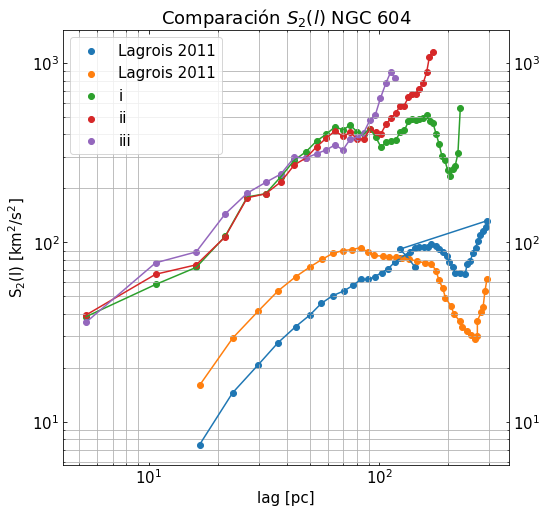

In [58]:
fig, ax=plt.subplots(figsize=(8,8))

plt.scatter(dtx['pc'],dtx['S'],label='Lagrois 2011')
plt.loglog(dtx['pc'],dtx['S'])
plt.scatter(dtx['pc.1'],dtx['S.1'],label='Lagrois 2011')
plt.loglog(dtx['pc.1'],dtx['S.1'])
plt.scatter(sfH00['Lag']*4,sfH00['Nmqvd'],label='i')
plt.loglog(sfH00['Lag']*4,sfH00['Nmqvd'])
plt.scatter(sfH01['Lag']*4,sfH01['Nmqvd'],label='ii')
plt.loglog(sfH01['Lag']*4,sfH01['Nmqvd'])
plt.scatter(sfH02['Lag']*4,sfH02['Nmqvd'],label='iii')
plt.loglog(sfH02['Lag']*4,sfH02['Nmqvd'])

plt.grid(which='minor')
plt.title('Comparación $S_{2}(l)$ NGC 604')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

[Text(0, 0.5, 'S$_{2}$(l) [-]'), Text(0.5, 0, 'lag [pc]')]

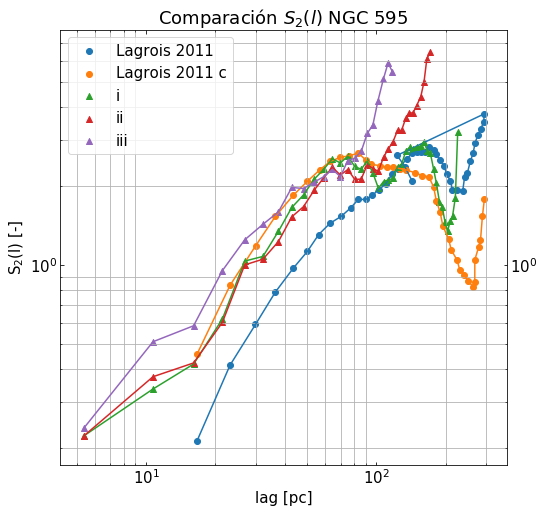

In [59]:
fig, ax=plt.subplots(figsize=(8,8))

plt.scatter(dtx['pc'],dtx['S']/35.04,label='Lagrois 2011')
plt.loglog(dtx['pc'],dtx['S']/35.04)
plt.scatter(dtx['pc.1'],dtx['S.1']/35.04,label='Lagrois 2011 c')
plt.loglog(dtx['pc.1'],dtx['S.1']/35.04)
plt.scatter(sfnH00['Lag']*4,sfnH00['Nmqvd'],label='i', marker='^')
plt.loglog(sfnH00['Lag']*4,sfnH00['Nmqvd'])
plt.scatter(sfnH01['Lag']*4,sfnH01['Nmqvd'],label='ii', marker='^')
plt.loglog(sfnH01['Lag']*4,sfnH01['Nmqvd'])
plt.scatter(sfnH02['Lag']*4,sfnH02['Nmqvd'],label='iii', marker='^')
plt.loglog(sfnH02['Lag']*4,sfnH02['Nmqvd'])

plt.grid(which='minor')
plt.title('Comparación $S_{2}(l)$ NGC 595')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='upper left')

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [-]')

In [60]:
sfnH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.222082,0.038712,0.607166,0.368651,1.341000,247.0,0.008106,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.335694,0.045983,0.770816,0.594158,2.682000,282.0,0.024272,0.596052,1.057589,0.151704,0.601782,0.213532
2,4.023000,0.418017,0.029791,0.900160,0.810288,4.023000,914.0,0.011455,0.577894,0.812711,0.362146,0.584250,0.106231
3,5.364000,0.621531,0.031266,1.062133,1.128126,5.364000,1155.0,0.010838,0.700493,0.915937,0.589227,0.735219,0.078300
4,6.705000,1.033094,0.040464,1.679605,2.821072,6.705000,1724.0,0.008921,0.881176,1.098038,0.830495,0.936570,0.066993
5,8.044000,1.076331,0.039838,1.642564,2.698016,8.044000,1701.0,0.007165,0.919470,1.008171,0.770226,0.899289,0.056686
6,9.385000,1.341892,0.042228,1.955731,3.824884,9.385000,2146.0,0.007783,0.959037,1.038862,0.825479,0.941126,0.050824
7,10.726000,1.654597,0.044670,2.207888,4.874768,10.726000,2444.0,0.007158,0.999020,1.070789,0.875417,0.981742,0.046587
8,12.067000,1.848639,0.048319,2.392179,5.722520,12.067000,2452.0,0.006835,1.022195,1.063466,0.879353,0.988338,0.045544
9,13.408000,2.119524,0.052017,2.631382,6.924169,13.408000,2560.0,0.007215,1.042034,1.073508,0.899208,1.004917,0.043788


In [61]:
sfnH01.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,31.000000,31.000000
mean,22.094101,2.572343,0.142446,2.638872,7.900224,22.094101,982.437500,0.017398,0.857819,inf,-inf,0.874490,0.056280
std,12.540121,1.536846,0.187054,0.983255,5.106332,12.540121,639.934671,0.016429,0.177399,NaN,NaN,0.075717,0.039984
min,1.341000,0.221930,0.037035,0.565412,0.319690,1.341000,22.000000,0.008249,0.000000,0.864311,-inf,0.601155,0.035661
25%,11.731750,1.631380,0.054942,2.141448,4.588547,11.731750,421.000000,0.009261,0.863942,0.925860,0.744639,0.852809,0.037632
50%,22.124500,2.320036,0.064827,2.597711,6.748113,22.124500,948.500000,0.011854,0.880391,0.962691,0.788320,0.875610,0.045782
75%,32.464646,3.349811,0.140944,3.335242,11.128020,32.464646,1551.500000,0.017588,0.935941,1.047858,0.814591,0.927766,0.051163
max,42.852705,6.487074,0.913048,4.409026,19.439509,42.852705,2158.000000,0.088161,0.999767,inf,0.881417,0.972307,0.246827


In [62]:
sfnH01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.221930,0.044286,0.565412,0.319690,1.341000,164.0,0.010357,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.373970,0.059563,0.842345,0.709545,2.682000,201.0,0.028743,0.752822,1.287160,0.240038,0.760007,0.246827
2,4.023000,0.422088,0.037035,0.959345,0.920344,4.023000,672.0,0.013646,0.603207,0.864311,0.335946,0.601155,0.124540
3,5.364000,0.602831,0.037954,1.090812,1.189871,5.364000,827.0,0.012814,0.676946,0.925430,0.542670,0.715016,0.091546
4,6.703000,0.999007,0.049055,1.714134,2.938255,6.703000,1222.0,0.010536,0.843173,1.103026,0.790549,0.912249,0.078866
5,8.044000,1.050368,0.047639,1.653704,2.734737,8.044000,1206.0,0.008526,0.880414,1.016726,0.740254,0.879131,0.065167
6,9.385000,1.226142,0.048572,1.885581,3.555417,9.385000,1508.0,0.009329,0.903988,1.012851,0.764199,0.893679,0.058759
7,10.726000,1.524287,0.049809,2.050668,4.205241,10.726000,1696.0,0.008570,0.938352,1.049251,0.823252,0.936952,0.053271
8,12.067000,1.667078,0.052780,2.171708,4.716316,12.067000,1694.0,0.008249,0.955431,1.033300,0.820345,0.936359,0.050794
9,13.408000,1.924543,0.056412,2.357184,5.556314,13.408000,1747.0,0.008754,0.973581,1.047394,0.846228,0.955735,0.047972


In [63]:
sfnH02.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,21.000000
mean,15.399002,2.462614,0.184950,2.606409,7.888708,15.399002,569.227273,0.021884,0.895524,inf,-inf,0.956137,0.065386
std,8.675472,1.556282,0.240967,1.071215,6.115416,8.675472,342.836756,0.016691,0.208630,NaN,NaN,0.064159,0.042465
min,1.341000,0.237529,0.046155,0.600016,0.360020,1.341000,22.000000,0.008094,0.000000,0.961517,-inf,0.839918,0.041692
25%,8.381250,1.468853,0.071677,2.047543,4.195480,8.381250,244.500000,0.013280,0.882857,1.016875,0.799430,0.904577,0.044647
50%,15.421500,2.168152,0.082517,2.522881,6.369119,15.421500,583.500000,0.015554,0.935274,1.085693,0.838587,0.955751,0.051290
75%,22.461750,3.056759,0.137782,3.032358,9.212037,22.461750,854.000000,0.022472,0.984873,1.147283,0.881296,0.992819,0.062207
max,29.331893,5.888873,1.031971,4.729084,22.364236,29.331893,1092.000000,0.079149,1.098449,inf,0.958029,1.107389,0.229974


In [64]:
sfnH02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.237529,0.046155,0.600016,0.360020,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.508608,0.071388,1.080298,1.167044,2.682000,230.0,0.025123,1.098449,1.599647,0.624072,1.107389,0.229974
2,4.023000,0.585156,0.051838,1.174095,1.378498,4.023000,514.0,0.018960,0.850573,1.094589,0.574594,0.839918,0.122641
3,5.364000,0.950405,0.064777,1.566739,2.454670,5.364000,586.0,0.017181,0.938524,1.203635,0.821207,0.987789,0.092356
4,6.705000,1.245724,0.068596,1.937768,3.754945,6.705000,799.0,0.013866,0.990971,1.197216,0.884141,1.024109,0.075022
5,8.046000,1.427651,0.072545,2.015658,4.062876,8.046000,773.0,0.013230,0.999019,1.149217,0.872758,1.006998,0.065243
6,9.387000,1.592460,0.071046,2.143197,4.593292,9.387000,911.0,0.013833,0.991473,1.111281,0.863109,0.988621,0.058506
7,10.728000,1.972667,0.078591,2.446443,5.985084,10.728000,970.0,0.012365,1.005014,1.140680,0.913045,1.019580,0.053983
8,12.069000,1.954101,0.078058,2.400829,5.763978,12.069000,947.0,0.012595,0.989362,1.075276,0.859747,0.974795,0.051148
9,13.410000,2.068288,0.080270,2.449236,5.998759,13.410000,932.0,0.012976,0.971403,1.050264,0.845585,0.955751,0.048665


In [65]:
sfnH00c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,41.000000,41.000000
mean,28.798483,2.024298,0.080753,2.273027,5.463268,28.798483,1396.595238,0.013371,0.748429,inf,-inf,0.746565,0.046727
std,16.421073,0.691042,0.065405,0.551227,2.160707,16.421073,905.363640,0.010200,0.206099,NaN,NaN,0.144649,0.030710
min,1.341000,0.247236,0.033433,0.669236,0.447877,1.341000,28.000000,0.006830,0.000000,0.582888,-inf,0.525968,0.029008
25%,15.084250,1.748567,0.052833,2.065290,4.266161,15.084250,619.500000,0.007849,0.618994,0.742900,0.555347,0.642557,0.030528
50%,28.829500,2.161359,0.058545,2.399874,5.759550,28.829500,1298.000000,0.009768,0.730092,0.787482,0.642523,0.720475,0.041411
75%,42.503085,2.458920,0.094178,2.631674,6.925727,42.503085,2272.000000,0.014004,0.923485,0.984767,0.763925,0.872769,0.048920
max,56.269438,3.664842,0.436138,3.029690,9.179025,56.269438,3193.000000,0.063878,1.026233,inf,0.884187,0.984140,0.212424


In [66]:
sfnH00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.247236,0.042582,0.669236,0.447877,1.341000,248.0,0.008076,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.379147,0.052127,0.876913,0.768976,2.682000,284.0,0.024233,0.616866,1.075419,0.174227,0.622171,0.212424
2,4.023000,0.466661,0.033433,1.010216,1.020536,4.023000,914.0,0.011455,0.582396,0.813277,0.365923,0.587199,0.105461
3,5.364000,0.677077,0.033865,1.150410,1.323443,5.364000,1155.0,0.010838,0.688081,0.898273,0.575072,0.720475,0.077319
4,6.705000,1.110050,0.043766,1.818781,3.307963,6.705000,1728.0,0.008905,0.858992,1.074605,0.809400,0.914332,0.066467
5,8.044000,1.142274,0.041879,1.727207,2.983244,8.044000,1702.0,0.007161,0.890528,0.979878,0.744717,0.871708,0.055958
6,9.385000,1.412343,0.044224,2.049610,4.200903,9.385000,2149.0,0.007773,0.925717,1.008645,0.797625,0.910663,0.050116
7,10.726000,1.720069,0.045192,2.234166,4.991499,10.726000,2445.0,0.007156,0.961514,1.036301,0.843686,0.947167,0.045776
8,12.067000,1.927838,0.049216,2.437546,5.941632,12.067000,2454.0,0.006830,0.983545,1.032309,0.850700,0.955518,0.044308
9,13.408000,2.201985,0.052415,2.653043,7.038635,13.408000,2563.0,0.007211,1.002687,1.042079,0.870282,0.971683,0.042425


In [67]:
sfnH01c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,31.000000,31.000000
mean,22.094101,2.527780,0.120174,2.459278,6.507203,22.094101,983.062500,0.017393,0.818636,inf,-inf,0.839061,0.056043
std,12.540121,1.481047,0.127620,0.688450,2.843162,12.540121,640.380831,0.016430,0.170210,NaN,NaN,0.073393,0.039584
min,1.341000,0.247085,0.040559,0.628072,0.394474,1.341000,22.000000,0.008245,0.000000,0.832477,-inf,0.619535,0.035360
25%,11.731750,1.769045,0.060541,2.347376,5.513932,11.731750,421.000000,0.009252,0.794217,0.878193,0.709280,0.795786,0.037436
50%,22.124500,2.361212,0.067735,2.672607,7.142932,22.124500,949.000000,0.011848,0.830127,0.917811,0.734070,0.823851,0.045732
75%,32.464646,3.110020,0.131245,2.913538,8.488919,32.464646,1554.000000,0.017588,0.903137,1.023556,0.792354,0.898427,0.052268
max,42.852705,6.975169,0.644690,3.319099,11.016416,42.852705,2159.000000,0.088161,0.973832,inf,0.883956,0.945437,0.244789


In [68]:
sfnH01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.247085,0.049044,0.628072,0.394474,1.341000,165.0,0.010301,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.414972,0.065328,0.926179,0.857808,2.682000,202.0,0.028724,0.748006,1.278135,0.239661,0.755267,0.244789
2,4.023000,0.480010,0.041524,1.075629,1.156978,4.023000,672.0,0.013646,0.619922,0.881385,0.357297,0.619535,0.123529
3,5.364000,0.678367,0.040559,1.165686,1.358823,5.364000,827.0,0.012814,0.689038,0.930022,0.553447,0.724169,0.089911
4,6.703000,1.111122,0.053435,1.868704,3.492053,6.703000,1224.0,0.010526,0.848001,1.100974,0.791132,0.913369,0.077753
5,8.044000,1.159198,0.051220,1.778754,3.163967,8.044000,1207.0,0.008520,0.879440,1.010458,0.736526,0.875475,0.064587
6,9.385000,1.341469,0.052331,2.033507,4.135152,9.385000,1511.0,0.009312,0.897895,1.002887,0.755992,0.885591,0.058410
7,10.726000,1.663094,0.054421,2.241176,5.022869,10.726000,1697.0,0.008566,0.928960,1.038910,0.813930,0.927267,0.053033
8,12.067000,1.804362,0.058132,2.392602,5.724546,12.067000,1695.0,0.008245,0.942727,1.020090,0.807633,0.923483,0.050689
9,13.408000,2.042951,0.061723,2.580595,6.659471,13.408000,1749.0,0.008748,0.955759,1.026496,0.825506,0.935920,0.048061


In [69]:
sfnH02c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,21.000000
mean,15.399002,2.542405,0.145297,2.237196,5.431175,15.399002,569.545455,0.021882,0.818834,inf,-inf,0.886022,0.060133
std,8.675472,1.673524,0.159431,0.668147,2.756287,8.675472,343.129398,0.016693,0.193532,NaN,NaN,0.070150,0.038354
min,1.341000,0.280993,0.050255,0.653321,0.426828,1.341000,22.000000,0.008094,0.000000,0.886051,-inf,0.799527,0.039795
25%,8.381250,1.428890,0.068798,1.905900,3.632459,8.381250,244.500000,0.013269,0.811482,0.934349,0.737433,0.834268,0.042828
50%,15.421500,2.107739,0.075797,2.322647,5.403682,15.421500,583.500000,0.015554,0.835562,0.986816,0.771892,0.867943,0.047995
75%,22.461750,3.360066,0.131054,2.760200,7.621228,22.461750,854.250000,0.022472,0.887882,1.072385,0.816865,0.935368,0.054265
max,29.331893,6.277784,0.722732,3.311975,10.969180,29.331893,1093.000000,0.079149,1.072394,inf,0.943924,1.080256,0.209556


In [70]:
sfnH02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.280993,0.050255,0.653321,0.426828,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.590905,0.074817,1.132194,1.281864,2.682000,230.0,0.025123,1.072394,1.528670,0.639704,1.080256,0.209556
2,4.023000,0.674196,0.053907,1.220971,1.490771,4.023000,514.0,0.018960,0.826328,1.046013,0.571009,0.814450,0.112065
3,5.364000,1.043698,0.063156,1.527530,2.333347,5.364000,586.0,0.017181,0.892199,1.131070,0.782833,0.935368,0.083951
4,6.705000,1.300061,0.066609,1.882810,3.544974,6.705000,800.0,0.013865,0.921289,1.105263,0.816871,0.947808,0.068831
5,8.046000,1.412293,0.068686,1.909669,3.646836,8.046000,774.0,0.013215,0.906575,1.037627,0.781491,0.908565,0.060377
6,9.387000,1.478683,0.063069,1.904643,3.627666,9.387000,913.0,0.013806,0.874931,0.976096,0.746412,0.865813,0.054265
7,10.728000,1.765674,0.070795,2.203748,4.856505,10.728000,970.0,0.012365,0.870307,0.997537,0.785066,0.884303,0.050405
8,12.069000,1.733765,0.069132,2.126309,4.521190,12.069000,947.0,0.012595,0.844875,0.935667,0.734787,0.838443,0.047421
9,13.410000,1.828299,0.070236,2.143053,4.592676,13.410000,932.0,0.012976,0.822438,0.915300,0.724881,0.820873,0.044887


In [71]:
sfwH00.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,56.000000,44.000000,44.000000,44.000000,44.000000,43.000000,43.000000
mean,30.108179,2.612180,0.167249,6.202641,65.948400,30.108179,1046.785714,0.015082,-0.018211,inf,-inf,-0.005827,0.080190
std,17.145696,2.187330,0.155651,5.302322,86.147704,17.145696,990.777192,0.016795,0.467296,NaN,NaN,0.458557,0.047188
min,1.341000,0.145122,0.015670,0.044250,0.001958,1.341000,0.000000,0.000000,-0.900111,-0.591459,-inf,-0.725669,0.052911
25%,15.754750,0.502119,0.064340,1.252908,1.595586,15.754750,23.000000,0.007749,-0.317929,-0.271441,-0.560624,-0.380543,0.056709
50%,30.171171,2.210999,0.145522,5.670590,32.326433,30.171171,863.500000,0.009772,0.101184,0.229319,-0.085888,0.099559,0.059869
75%,44.510353,4.264065,0.219067,9.433460,88.997655,44.510353,1779.250000,0.014120,0.312798,0.506446,0.207395,0.328323,0.092100
max,57.976285,6.919491,0.872008,18.094162,327.398697,57.976285,3190.000000,0.101764,1.316169,inf,0.672372,1.342186,0.322061


In [72]:
sfwH00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,1.984107,0.568771,8.920826,79.581132,1.341000,247.0,0.008106,0.000000,inf,-inf,NaN,NaN
1,2.682000,4.940506,0.872008,14.617518,213.671831,2.682000,282.0,0.024272,1.316169,2.038018,0.672372,1.342186,0.322061
2,4.023000,2.054894,0.248343,7.503897,56.308474,4.023000,914.0,0.011455,0.170201,0.443240,-0.314762,0.099559,0.180975
3,5.364000,2.431442,0.202338,6.873551,47.245699,5.364000,1155.0,0.010838,0.035512,0.447995,-0.097830,0.128559,0.134143
4,6.705000,3.166342,0.190317,7.899879,62.408086,6.705000,1724.0,0.008921,0.096369,0.536572,0.095292,0.242744,0.119955
5,8.044000,3.109082,0.183741,7.575822,57.393077,8.044000,1701.0,0.007165,0.110670,0.471322,0.076020,0.219337,0.103196
6,9.385000,3.558630,0.198245,9.181570,84.301233,9.385000,2146.0,0.007783,0.148364,0.501733,0.141252,0.263783,0.097157
7,10.726000,4.217787,0.189846,9.383487,88.049836,10.726000,2444.0,0.007158,0.202254,0.546336,0.219326,0.322639,0.091413
8,12.067000,4.402899,0.243443,12.052263,145.257048,12.067000,2452.0,0.006835,0.238787,0.541048,0.222189,0.334008,0.084614
9,13.408000,6.662156,0.357687,18.094162,327.398697,13.408000,2560.0,0.007215,0.326296,0.695513,0.392644,0.471484,0.092787


In [73]:
sfwH01.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,43.000000,34.000000,34.000000,34.000000,33.000000,32.000000,32.000000
mean,23.394773,5.101304,0.545987,9.806289,126.629186,23.394773,731.302326,0.017815,0.184943,inf,-inf,0.204478,0.086180
std,13.252394,2.611775,0.843203,5.602597,130.164200,13.252394,700.074572,0.017110,0.268916,NaN,NaN,0.272732,0.051377
min,1.341000,1.830880,0.149443,2.306305,5.319045,1.341000,0.000000,0.000000,-0.169816,-0.024818,-inf,-0.140183,0.057686
25%,12.402250,3.049800,0.260629,4.828652,23.316541,12.402250,14.000000,0.009135,0.004562,0.160672,-0.214640,0.000904,0.060324
50%,23.465500,4.397607,0.319844,9.173898,84.199147,23.465500,562.000000,0.011854,0.159699,0.393658,0.027279,0.184334,0.064962
75%,34.427252,7.285369,0.427335,13.337585,177.994133,34.427252,1396.000000,0.018393,0.362350,0.499075,0.205624,0.355129,0.090620
max,44.680581,10.036392,4.873170,21.957005,482.110072,44.680581,2158.000000,0.088161,1.216034,inf,0.580923,1.242031,0.317954


In [74]:
sfwH01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,3.064525,0.871909,11.131787,123.916687,1.341000,164.0,0.010357,0.000000,inf,-inf,NaN,NaN
1,2.682000,7.119112,1.230970,17.408538,303.057192,2.682000,201.0,0.028743,1.216034,1.929137,0.580923,1.242031,0.317954
2,4.023000,2.849393,0.343108,8.887747,78.992049,4.023000,672.0,0.013646,0.071826,0.341985,-0.410949,0.000954,0.179811
3,5.364000,3.444736,0.284061,8.163971,66.650419,5.364000,827.0,0.012814,-0.035384,0.383029,-0.158328,0.063106,0.133784
4,6.703000,4.487844,0.268174,9.370739,87.810748,6.703000,1222.0,0.010536,0.040693,0.481198,0.043180,0.188357,0.119553
5,8.044000,4.392197,0.258607,8.977057,80.587545,8.044000,1206.0,0.008526,0.063585,0.419727,0.027279,0.170197,0.102229
6,9.385000,5.017444,0.282617,10.971222,120.367717,9.385000,1508.0,0.009329,0.106959,0.453628,0.094912,0.218500,0.096033
7,10.726000,5.967913,0.271208,11.165717,124.673240,10.726000,1696.0,0.008570,0.166022,0.502942,0.177762,0.282242,0.090143
8,12.067000,6.195070,0.353917,14.562313,212.060950,12.067000,1694.0,0.008249,0.205466,0.498036,0.179628,0.294377,0.083366
9,13.408000,9.619393,0.525474,21.957005,482.110072,13.408000,1747.0,0.008754,0.299682,0.665327,0.363672,0.442893,0.092052


In [75]:
sfwH02.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,30.000000,24.000000,24.000000,24.000000,24.000000,23.000000,23.000000
mean,16.716240,12.237938,0.934825,18.858881,459.747115,16.716240,417.900000,0.025513,0.452561,inf,-inf,0.481133,0.091156
std,9.415673,5.475915,0.262523,10.421869,430.465964,9.415673,387.638594,0.027888,0.235276,NaN,NaN,0.257142,0.051287
min,1.341000,2.920559,0.580066,1.221985,1.493246,1.341000,0.000000,0.000000,0.000000,0.098186,-inf,-0.042655,0.057025
25%,9.051750,8.578443,0.672831,13.985234,196.778168,9.051750,14.500000,0.013166,0.380968,0.533782,0.216399,0.425469,0.059740
50%,16.762500,12.111445,0.974157,17.694289,314.248501,16.762500,384.000000,0.015554,0.429119,0.675099,0.339666,0.475228,0.077824
75%,24.415335,17.106291,1.115083,24.347708,594.318058,24.415335,792.500000,0.024012,0.527780,0.775477,0.420937,0.557489,0.092348
max,31.681275,20.981064,1.562103,39.603421,1568.430991,31.681275,1092.000000,0.130853,1.344943,inf,0.769192,1.370776,0.289870


In [76]:
sfwH02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,4.161094,1.124263,14.615420,213.610498,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,10.570017,1.562103,23.638915,558.798300,2.682000,230.0,0.025123,1.344943,1.998193,0.769192,1.370776,0.289870
2,4.023000,6.590469,0.705870,15.987599,255.603333,4.023000,514.0,0.018960,0.518324,0.797878,0.097758,0.471320,0.166132
3,5.364000,8.197669,0.628183,15.193712,230.848888,5.364000,586.0,0.017181,0.411924,0.769584,0.259097,0.480202,0.123510
4,6.705000,9.831675,0.588234,16.616961,276.123402,6.705000,799.0,0.013866,0.414589,0.766046,0.347310,0.509315,0.106003
5,8.046000,9.438665,0.581122,16.146410,260.706555,8.046000,773.0,0.013230,0.378858,0.666243,0.288169,0.444423,0.093046
6,9.387000,10.840381,0.652519,19.684020,387.460646,9.387000,911.0,0.013833,0.381671,0.683955,0.337249,0.467625,0.088935
7,10.728000,12.444632,0.625979,19.485942,379.701940,10.728000,970.0,0.012365,0.402201,0.701896,0.386998,0.497031,0.083712
8,12.069000,12.135227,0.679601,20.902578,436.917774,12.069000,947.0,0.012595,0.401171,0.655276,0.352054,0.469500,0.076721
9,13.410000,19.969239,1.195410,36.474695,1330.403376,13.410000,932.0,0.012976,0.475166,0.843190,0.550479,0.622945,0.091650


In [77]:
sfwH00c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,56.000000,44.000000,44.000000,44.000000,44.000000,43.000000,43.000000
mean,30.108179,3.154024,0.204135,7.407642,96.940836,30.108179,1047.625000,0.015076,-0.003306,inf,-inf,0.007566,0.081933
std,17.145696,2.671645,0.180571,6.560944,130.214860,17.145696,991.474156,0.016796,0.475370,NaN,NaN,0.464313,0.049079
min,1.341000,0.194571,0.019120,0.291549,0.085001,1.341000,0.000000,0.000000,-0.893103,-0.548138,-inf,-0.702119,0.052244
25%,15.754750,0.548907,0.070322,1.299821,1.724631,15.754750,23.000000,0.007741,-0.324797,-0.230499,-0.593807,-0.394863,0.056861
50%,30.171171,2.594103,0.181870,6.673886,44.671387,30.171171,865.000000,0.009768,0.135775,0.254106,-0.061344,0.109227,0.060443
75%,44.510353,5.043698,0.266170,11.726085,137.514382,44.510353,1782.750000,0.014115,0.340538,0.529310,0.226994,0.343375,0.090212
max,57.976285,8.190508,0.987715,22.315184,497.967449,57.976285,3193.000000,0.101764,1.297545,inf,0.655274,1.323222,0.321097


In [78]:
sfwH00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,2.277921,0.650268,10.219756,104.443414,1.341000,248.0,0.008076,0.000000,inf,-inf,NaN,NaN
1,2.682000,5.599363,0.987715,16.615945,276.089639,2.682000,284.0,0.024233,1.297545,2.016845,0.655274,1.323222,0.321097
2,4.023000,2.388689,0.299474,9.048887,81.882357,4.023000,914.0,0.011455,0.178288,0.456684,-0.307293,0.109227,0.182265
3,5.364000,2.953174,0.255807,8.689917,75.514660,5.364000,1155.0,0.010838,0.070935,0.489661,-0.059228,0.167123,0.135203
4,6.705000,3.844917,0.240298,9.986106,99.722305,6.705000,1728.0,0.008905,0.137142,0.571774,0.129133,0.279350,0.119397
5,8.044000,3.773372,0.236684,9.761599,95.288824,8.044000,1702.0,0.007161,0.151178,0.503299,0.105390,0.253289,0.102635
6,9.385000,4.269699,0.257323,11.926007,142.229652,9.385000,2149.0,0.007773,0.184155,0.525737,0.161896,0.290596,0.096139
7,10.726000,5.037021,0.243575,12.041558,144.999118,10.726000,2445.0,0.007156,0.233334,0.566020,0.237040,0.345465,0.090046
8,12.067000,5.063730,0.267652,13.256192,175.726635,12.067000,2454.0,0.006830,0.259249,0.540027,0.224580,0.341285,0.081546
9,13.408000,7.681469,0.404576,20.478100,419.352592,13.408000,2563.0,0.007211,0.339908,0.696219,0.395373,0.477167,0.090378


In [79]:
sfwH01c.describe()

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,43.000000,34.000000,34.000000,34.000000,34.000000,33.000000,33.000000
mean,23.394773,5.941137,0.450177,11.130116,169.980577,23.394773,731.767442,0.017810,0.205036,inf,-inf,0.218005,0.083382
std,13.252394,2.972899,0.275925,6.891887,176.617329,13.252394,700.546414,0.017111,0.259527,NaN,NaN,0.265192,0.049874
min,1.341000,2.302352,0.205231,1.101532,1.213374,1.341000,0.000000,0.000000,-0.158787,0.019386,-inf,-0.114715,0.055733
25%,12.402250,3.335519,0.279653,5.082025,25.925527,12.402250,14.000000,0.009132,0.023836,0.153895,-0.178649,0.029954,0.059478
50%,23.465500,5.251803,0.370267,11.022675,121.510337,23.465500,562.000000,0.011848,0.183229,0.403234,0.053852,0.209993,0.062669
75%,34.427252,8.632802,0.479323,15.583982,242.860640,34.427252,1396.000000,0.018393,0.365854,0.514853,0.232843,0.366943,0.090606
max,44.680581,11.105957,1.369924,24.759339,613.024888,44.680581,2159.000000,0.088161,1.227362,inf,0.596719,1.253965,0.316286


In [80]:
sfwH01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,3.440149,0.980209,12.552795,157.572664,1.341000,165.0,0.010301,0.000000,inf,-inf,NaN,NaN
1,2.682000,8.054713,1.369924,19.422028,377.215190,2.682000,202.0,0.028724,1.227362,1.937814,0.596719,1.253965,0.316286
2,4.023000,3.304994,0.406202,10.522123,110.715071,4.023000,672.0,0.013646,0.099611,0.374306,-0.384054,0.029954,0.180995
3,5.364000,4.098064,0.340959,9.799243,96.025163,5.364000,827.0,0.012814,0.004738,0.425810,-0.117271,0.104426,0.134319
4,6.703000,5.308889,0.324174,11.336820,128.523488,6.703000,1224.0,0.010526,0.078818,0.514882,0.074671,0.222790,0.119250
5,8.044000,5.194717,0.314390,10.917969,119.202038,8.044000,1207.0,0.008520,0.098605,0.450048,0.055256,0.201303,0.102062
6,9.385000,5.831109,0.338800,13.165327,173.325839,9.385000,1511.0,0.009312,0.134490,0.472605,0.111594,0.239563,0.095292
7,10.726000,6.850438,0.323624,13.327652,177.626310,10.726000,1697.0,0.008566,0.185845,0.514768,0.187422,0.296012,0.089308
8,12.067000,6.896856,0.390448,16.070134,258.249199,12.067000,1695.0,0.008245,0.214409,0.494296,0.175948,0.294884,0.081913
9,13.408000,10.578697,0.574221,24.007674,576.368409,13.408000,1749.0,0.008748,0.299383,0.656507,0.354760,0.436883,0.090606


In [81]:
sfwH02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,4.972190,1.319360,17.151679,294.180079,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,13.330909,1.864457,28.214350,796.049540,2.682000,230.0,0.025123,1.422822,2.056545,0.865932,1.448433,0.280825
2,4.023000,8.634058,0.935724,21.193694,449.172673,4.023000,514.0,0.018960,0.601441,0.876659,0.183683,0.553928,0.164484
3,5.364000,10.833579,0.865105,20.924088,437.817459,5.364000,586.0,0.017181,0.487657,0.839630,0.331979,0.553088,0.122600
4,6.705000,12.370720,0.812022,22.953084,526.844088,6.705000,800.0,0.013865,0.461366,0.797425,0.377915,0.545569,0.104684
5,8.046000,11.454036,0.789251,21.943452,481.515064,8.046000,774.0,0.013215,0.399274,0.675021,0.294537,0.456277,0.092651
6,9.387000,12.444643,0.817484,24.687474,609.471365,9.387000,913.0,0.013806,0.373701,0.662626,0.315604,0.450643,0.087618
7,10.728000,14.175785,0.831776,25.892156,670.403751,10.728000,970.0,0.012365,0.376802,0.679534,0.361568,0.472635,0.084543
8,12.069000,13.449822,0.859379,26.432015,698.651441,12.069000,947.0,0.012595,0.360547,0.621421,0.315730,0.432566,0.077820
9,13.410000,22.777013,1.473363,44.955675,2021.012690,13.410000,932.0,0.012976,0.430036,0.822089,0.529696,0.593940,0.096058


In [82]:
sfw2H00

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.322990,0.082700,1.299727,1.689291,1.341000,248.0,0.008076,0.000000,inf,-inf,NaN,NaN
1,2.682000,0.973411,0.145765,2.452150,6.013038,2.682000,284.0,0.024233,1.591558,2.219584,1.028636,1.613259,0.280849
2,4.023000,0.966531,0.106256,3.212387,10.319429,4.023000,915.0,0.011467,1.061652,1.361869,0.684192,1.035904,0.160075
3,5.364000,1.181667,0.104874,3.562626,12.692301,5.364000,1155.0,0.010838,0.912250,1.210322,0.704145,0.942239,0.119933
4,6.705000,1.526155,0.104544,4.345825,18.886195,6.705000,1729.0,0.008900,0.886175,1.189803,0.779127,0.951702,0.100426
5,8.044000,1.460065,0.098353,4.056391,16.454311,8.044000,1702.0,0.007161,0.810089,1.043576,0.675915,0.843193,0.087706
6,9.385000,1.753594,0.099577,4.615024,21.298451,9.385000,2149.0,0.007773,0.787037,1.049908,0.722298,0.853081,0.081790
7,10.726000,1.813504,0.093093,4.602242,21.180633,10.726000,2445.0,0.007156,0.758496,0.996138,0.694830,0.816488,0.074861
8,12.067000,1.719584,0.087582,4.337739,18.815983,12.067000,2454.0,0.006830,0.714358,0.918348,0.633562,0.755423,0.069187
9,13.408000,2.147934,0.098935,5.007728,25.077338,13.408000,2563.0,0.007211,0.709737,0.970904,0.703393,0.794678,0.071959


In [83]:
sfw2H01

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.402339,0.102074,1.307188,1.708739,1.341000,165.0,0.010301,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.132161,0.165457,2.345752,5.502550,2.682000,202.0,0.028724,1.492597,2.111560,0.938470,1.514209,0.276641
2,4.023000,1.091672,0.118338,3.067666,9.410573,4.023000,673.0,0.013663,0.971464,1.268619,0.598330,0.946137,0.158327
3,5.364000,1.366875,0.119346,3.430042,11.765188,5.364000,827.0,0.012814,0.850770,1.153672,0.653198,0.885880,0.118830
4,6.703000,1.783140,0.119798,4.191216,17.566293,6.703000,1225.0,0.010518,0.843442,1.147502,0.741507,0.910817,0.099568
5,8.044000,1.690014,0.112567,3.909157,15.281507,8.044000,1207.0,0.008520,0.774656,1.000447,0.636428,0.803844,0.086623
6,9.385000,2.033009,0.114512,4.449775,19.800494,9.385000,1511.0,0.009312,0.757096,1.011157,0.686593,0.818282,0.080475
7,10.726000,2.094121,0.108133,4.453208,19.831060,10.726000,1697.0,0.008566,0.731649,0.958311,0.659119,0.783026,0.073573
8,12.067000,1.964272,0.101952,4.196182,17.607946,12.067000,1695.0,0.008245,0.687966,0.877907,0.594514,0.720129,0.068075
9,13.408000,2.459446,0.115508,4.829289,23.322031,13.408000,1749.0,0.008748,0.684491,0.933326,0.667203,0.761673,0.070195


In [84]:
sfw2H02

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.433398,0.106167,1.380171,1.904871,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.198303,0.154586,2.339308,5.472363,2.682000,230.0,0.025123,1.467228,2.047661,0.951862,1.488917,0.258434
2,4.023000,1.401709,0.126766,2.871192,8.243746,4.023000,514.0,0.018960,1.111374,1.403005,0.782708,1.099029,0.146292
3,5.364000,1.693238,0.131110,3.171130,10.056065,5.364000,586.0,0.017181,0.977951,1.239499,0.766822,0.994757,0.111622
4,6.705000,2.104242,0.132548,3.749015,14.055110,6.705000,801.0,0.013851,0.935462,1.194286,0.805178,0.978309,0.093367
5,8.046000,1.830260,0.120820,3.359142,11.283835,8.046000,774.0,0.013215,0.819381,0.996491,0.643590,0.819820,0.083180
6,9.387000,2.113223,0.123427,3.727423,13.893679,9.387000,913.0,0.013806,0.765737,0.987747,0.670649,0.808045,0.076710
7,10.728000,2.029701,0.117192,3.648037,13.308176,10.728000,970.0,0.012365,0.704520,0.904623,0.608532,0.739225,0.071213
8,12.069000,1.786500,0.105704,3.251143,10.569931,12.069000,947.0,0.012595,0.627663,0.798658,0.517134,0.647818,0.066864
9,13.410000,2.319451,0.126537,3.860933,14.906804,13.410000,932.0,0.012976,0.609573,0.873600,0.608978,0.697383,0.071940


In [85]:
sfw2H00c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.414898,0.099148,1.558232,2.428087,1.341000,248.0,0.008076,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.242849,0.226572,3.811529,14.527750,2.682000,284.0,0.024233,1.582823,2.218394,0.983326,1.594848,0.291150
2,4.023000,0.896670,0.095912,2.899643,8.407928,4.023000,915.0,0.011467,0.796386,1.042551,0.403461,0.747466,0.151953
3,5.364000,0.964675,0.090216,3.064679,9.392255,5.364000,1155.0,0.010838,0.574119,0.870120,0.383247,0.609162,0.115645
4,6.705000,1.345078,0.084597,3.516622,12.366631,6.705000,1729.0,0.008900,0.586397,0.938372,0.557298,0.694022,0.099991
5,8.044000,1.186557,0.074159,3.058550,9.354729,8.044000,1702.0,0.007161,0.518063,0.772803,0.430899,0.573922,0.083752
6,9.385000,1.541480,0.080595,3.735306,13.952508,9.385000,2149.0,0.007773,0.530856,0.841092,0.536818,0.636256,0.083636
7,10.726000,1.692427,0.079918,3.950869,15.609367,10.726000,2445.0,0.007156,0.542958,0.829676,0.549829,0.640821,0.077117
8,12.067000,1.720693,0.083509,4.136032,17.106762,12.067000,2454.0,0.006830,0.541482,0.793298,0.527259,0.620680,0.070551
9,13.408000,2.389621,0.108830,5.508543,30.344049,13.408000,2563.0,0.007211,0.584976,0.898386,0.647126,0.710163,0.078226


In [86]:
sfw2H01c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.584323,0.151392,1.938759,3.758786,1.341000,165.0,0.010301,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.473413,0.259454,3.678399,13.530616,2.682000,202.0,0.028724,1.334323,2.000950,0.722501,1.352591,0.301426
2,4.023000,0.952492,0.095360,2.472021,6.110887,4.023000,673.0,0.013663,0.540557,0.804577,0.139038,0.494724,0.157981
3,5.364000,1.080565,0.093619,2.690628,7.239478,5.364000,827.0,0.012814,0.386141,0.719723,0.211912,0.439259,0.121641
4,6.703000,1.452008,0.082337,2.880610,8.297912,6.703000,1225.0,0.010518,0.421897,0.786308,0.386221,0.531475,0.104374
5,8.044000,1.299959,0.076351,2.651492,7.030408,8.044000,1207.0,0.008520,0.377572,0.645590,0.283959,0.435707,0.088480
6,9.385000,1.618934,0.079521,3.090103,9.548738,9.385000,1511.0,0.009312,0.397080,0.702522,0.379459,0.493020,0.085629
7,10.726000,1.753562,0.078605,3.237149,10.479136,10.726000,1697.0,0.008566,0.413902,0.693842,0.395670,0.501138,0.078788
8,12.067000,1.737189,0.081992,3.374633,11.388147,12.067000,1695.0,0.008245,0.413300,0.653402,0.369054,0.478585,0.072126
9,13.408000,2.394423,0.106602,4.456914,19.864081,13.408000,1749.0,0.008748,0.458344,0.761748,0.492744,0.570945,0.078316


In [87]:
sfw2H02c

,Lag,Nmqvd,ErrY,StD,Var,Lag pc,# P,ErrX,Exp,Exp1,Exp2,Alpha,ErrT
0,1.341000,0.437346,0.102962,1.338501,1.791586,1.341000,170.0,0.008094,0.000000,inf,-inf,NaN,NaN
1,2.682000,1.007105,0.140939,2.132801,4.548839,2.682000,230.0,0.025123,1.203368,1.779601,0.680862,1.221277,0.259078
2,4.023000,0.942664,0.078469,1.777274,3.158701,4.023000,514.0,0.018960,0.753357,1.016171,0.427504,0.732344,0.139015
3,5.364000,1.157047,0.084634,2.047026,4.190313,5.364000,586.0,0.017181,0.668450,0.946359,0.494504,0.703104,0.107439
4,6.705000,1.456517,0.075409,2.132878,4.549167,6.705000,801.0,0.013851,0.674339,0.945666,0.583125,0.734377,0.088897
5,8.046000,1.245057,0.069146,1.922454,3.695828,8.046000,774.0,0.013215,0.588215,0.763884,0.434021,0.595373,0.077804
6,9.387000,1.549856,0.077309,2.334687,5.450765,9.387000,913.0,0.013806,0.578263,0.813144,0.515240,0.635549,0.074009
7,10.728000,1.624425,0.080817,2.515734,6.328919,10.728000,970.0,0.012365,0.566084,0.783466,0.504818,0.618123,0.069029
8,12.069000,1.571050,0.084625,2.602817,6.774655,12.069000,947.0,0.012595,0.539901,0.728043,0.460577,0.576174,0.064758
9,13.410000,2.195482,0.111058,3.388623,11.482762,13.410000,932.0,0.012976,0.568361,0.838716,0.586345,0.664474,0.071260


In [88]:
afH00

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.926642,0.083851,0.008060,1.320487,1.743687,1.341000,248
2,2.682000,0.999554,0.075003,0.024191,1.263974,1.597630,2.682000,284
3,4.023000,0.687634,0.037396,0.011461,1.131186,1.279582,4.023000,915
4,5.364000,0.709404,0.035249,0.010834,1.197933,1.435043,5.364000,1155
5,6.705000,0.407987,0.024673,0.008897,1.025936,1.052546,6.705000,1729
6,8.044000,0.421297,0.026790,0.007159,1.105213,1.221496,8.044000,1702
7,9.385000,0.325205,0.023880,0.007771,1.106996,1.225441,9.385000,2149
8,10.726000,0.136152,0.019531,0.007154,0.965752,0.932678,10.726000,2445
9,12.067000,0.047234,0.019427,0.006829,0.962358,0.926133,12.067000,2454


In [89]:
afH00c

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.894499,0.066529,0.008060,1.047704,1.097684,1.341000,248
2,2.682000,0.979773,0.061980,0.024191,1.044511,1.091004,2.682000,284
3,4.023000,0.666533,0.031481,0.011461,0.952254,0.906787,4.023000,915
4,5.364000,0.671721,0.028168,0.010834,0.957300,0.916423,5.364000,1155
5,6.705000,0.381150,0.022729,0.008897,0.945120,0.893253,6.705000,1729
6,8.044000,0.385944,0.023066,0.007159,0.951602,0.905547,8.044000,1702
7,9.385000,0.294451,0.021764,0.007771,1.008911,1.017902,9.385000,2149
8,10.726000,0.117685,0.019367,0.007154,0.957663,0.917118,10.726000,2445
9,12.067000,0.013914,0.019559,0.006829,0.968901,0.938769,12.067000,2454


In [90]:
afH01

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.964539,0.073411,0.006697,1.190528,1.417357,1.341000,263
2,2.682000,0.880830,0.056809,0.019507,1.107417,1.226373,2.682000,380
3,4.023000,0.676204,0.035259,0.014463,1.049513,1.101478,4.023000,886
4,5.364000,0.653237,0.034023,0.012891,1.092983,1.194613,5.364000,1032
5,6.705000,0.378515,0.025709,0.010363,0.978280,0.957031,6.705000,1448
6,8.046000,0.390935,0.027798,0.009828,1.047896,1.098085,8.046000,1421
7,9.387000,0.315232,0.025455,0.010081,1.054445,1.111854,9.387000,1716
8,10.728000,0.127324,0.021364,0.008995,0.929782,0.864495,10.728000,1894
9,12.069000,0.055133,0.020872,0.009016,0.905705,0.820302,12.069000,1883


In [91]:
afH01c

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.925861,0.063257,0.006697,1.025853,1.052374,1.341000,263
2,2.682000,0.877812,0.054754,0.019507,1.067348,1.139233,2.682000,380
3,4.023000,0.637275,0.031468,0.014463,0.936666,0.877344,4.023000,886
4,5.364000,0.597667,0.028669,0.012891,0.920977,0.848199,5.364000,1032
5,6.705000,0.342002,0.024116,0.010363,0.917665,0.842108,6.705000,1448
6,8.046000,0.330552,0.023690,0.009828,0.893038,0.797517,8.046000,1421
7,9.387000,0.264785,0.022617,0.010081,0.936885,0.877753,9.387000,1716
8,10.728000,0.082336,0.020339,0.008995,0.885138,0.783469,10.728000,1894
9,12.069000,-0.003189,0.019695,0.009016,0.854637,0.730405,12.069000,1883


In [92]:
afH02

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.887506,0.107416,0.012285,1.116295,1.246115,1.341000,108
2,2.682000,0.758071,0.091711,0.038421,0.944221,0.891553,2.682000,106
3,4.022735,0.671759,0.049996,0.017132,0.977164,0.954850,4.022735,382
4,5.362000,0.561527,0.050046,0.016853,1.074532,1.154618,5.362000,461
5,6.703000,0.270721,0.036504,0.013983,0.955407,0.912803,6.703000,685
6,8.044000,0.243318,0.039686,0.011512,1.024952,1.050527,8.044000,667
7,9.385000,0.157163,0.035564,0.012833,1.015282,1.030797,9.385000,815
8,10.726000,-0.083674,0.028805,0.011782,0.854994,0.731015,10.726000,881
9,12.067000,-0.078376,0.029136,0.011639,0.857903,0.735997,12.067000,867


In [93]:
afH02c

,Lag,Nmqvd,ErrY,ErrX,StD,Var,Lag pc,# P
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1.341000,0.801795,0.078837,0.012285,0.819295,0.671244,1.341000,108
2,2.682000,0.756982,0.080832,0.038421,0.832221,0.692591,2.682000,106
3,4.022735,0.606691,0.042112,0.017132,0.823073,0.677449,4.022735,382
4,5.362000,0.466795,0.042101,0.016853,0.903953,0.817132,5.362000,461
5,6.703000,0.210756,0.033342,0.013983,0.872653,0.761523,6.703000,685
6,8.044000,0.181060,0.034859,0.011512,0.900293,0.810527,8.044000,667
7,9.385000,0.145279,0.031885,0.012833,0.910267,0.828586,9.385000,815
8,10.726000,-0.038600,0.029370,0.011782,0.871744,0.759937,10.726000,881
9,12.067000,-0.020430,0.029791,0.011639,0.877195,0.769471,12.067000,867
